# First session - To solve the first two tasks of the proposed project

To start we should load the pandas packages as pd along with the matplotlib.pyplot as we want to take a look on the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# First task (to group the modules' files into a single one for each module)

 We want to load the data into our workspace. To do so, we are going to use the **pd.read_csv** function (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). This is a very powerful function that will read most types of data files into a dataframe, **the big exception is .xlsx files**. Take a look on the documentation of the function for more info and fell free to ask me questions.

**For the MOD modules** The data from modules named "mod1.txt" or "mod2.txt" should follow a certain nomenclature in which the columns should be named: "Time", "RH", "Temperature", "TGS4161", "MICS2714", "TGS2442", "MICS5524", "TGS2602", "TGS2620". The separator of columns of these files is a '\t'. So, a suggestion of code to read these files is presented below:

In [ ]:
""" Get Directory from current position"""

def get_directories(current_position):
    files_and_directories = os.listdir(current_position)
    directory_names = []
    for item in files_and_directories:
        if os.path.isdir(os.path.join(current_position, item)):
            directory_names.append(item)
    return directory_names

print(get_directories("/content/drive/MyDrive/projet_data_science_m2/TP_Data_2024FISA/Libelium New"))

['part8', 'part5', 'part7', 'part3', 'part4', 'part6', 'part1', 'part2']


In [ ]:
""" Fonction permettant de regrouper les mods """

def group_mod(current_position, value_mod):
    #tab_directory va contenir tout les répertoires, par exemple : part1, part2, ...
    tab_directory = get_directories(current_position)

    mods = []
    for item in tab_directory:
        mod_part = pd.read_csv(
            f"{current_position}/{item}/mod{value_mod}.txt", sep="\t", header=None,
            names=("Time", "RH", "Temperature", "TGS4161", "MICS2714", "TGS2442", "MICS5524", "TGS2602", "TGS2620"))
        mods.append(mod_part)
    modGrouped = pd.concat(mods)
    modGrouped["Time"] = pd.to_datetime(modGrouped['Time']).dt.tz_localize('UTC+01:00', ambiguous='infer')
    modGrouped = modGrouped.drop_duplicates()
    # Trie le resultat en fonction de 'Time' pour avoir un ordre chronologique
    return modGrouped.sort_values(by='Time')

There are 8 parts for each "mod", so you should group all the 8 parts of each module into a single one (tip: pd.concat() function) and **save it in a .txt file**. Namely, one file representative of the data in "mod1" and another representative of the data in "mod2" (see pd.to_csv()). **The files must have the columns names!**
Don't forget to convert the data in the "Time" column into a **datetime** format and put them in the **correct timezone ("UTC+01:00")**. You can use the following peace of code to do that:

**And drop the duplicates!**

In [ ]:
# Création des fichiers uniques pour les capteurs mods : mod1 et mod2
current_directory_mods = "/content/drive/MyDrive/projet_data_science_m2/TP_Data_2024FISA/Libelium New"
mods1 = group_mod(current_directory_mods, 1)
mods2 = group_mod(current_directory_mods, 2)

# Sauvegarde des données par capteur mods dans leurs fichiers .txt respectifs
output = "/content/drive/MyDrive/projet_data_science_m2/projet_data/data/mod1Grouped.txt"
mods1.to_csv(output, sep="\t", index=False)

output = "/content/drive/MyDrive/projet_data_science_m2/projet_data/data/mod2Grouped.txt"
mods2.to_csv(output, sep="\t", index=False)

<ipython-input-4-1ffdaaeaede8>:14: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  modGrouped["Time"] = pd.to_datetime(modGrouped['Time']).dt.tz_localize('UTC+01:00', ambiguous='infer')
<ipython-input-4-1ffdaaeaede8>:14: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  modGrouped["Time"] = pd.to_datetime(modGrouped['Time']).dt.tz_localize('UTC+01:00', ambiguous='infer')


**For the POD modules** There are three sets of data in the folders named "14_nov-22_nov-Pods", "23_nov-12_nov-Pods" and "fevrier_mars_pods". Three files are present in each folder, each correspondent to one exemplar of the module. Again, you should group the data present in the folders (**pd.concat()**) and save it as a single one for each POD this time as a .csv file (see pd.to_csv()).  Namely, one for POD 200085, one for POD 200086 and one for POD 200088. **For these files the column separator is a ';'**. **The saved files must have the columns names!**

You don't need to name the columns of the dataframes resulting from importing the POD data. However, the column related to time is called "date" in these files, **so it is highly suggested to rename this column** to the same name as the one in the "mod" modules, i.e., 'Time'.

**Rename the 'date' column to 'Time', and to convert it to a datetime format, using pd.to_datetime()**

There are a few unnecessary rows in the dataframe, so delete any row that doesn't represent data. **You should also delete the columns named 'element', 'aqi' and 'Unnamed'**. You can use the skiprows parameter of the pd.read_csv function. Here's suggestion of code for loading POD data:

In [ ]:
""" Fonction permettant de suprimer toute les colonnes commencant par 'Unamed' """

def remove_unnamedColumns(tab):
    for columns in tab.columns:
        if columns.startswith('Unnamed:'):
            tab.drop(columns=columns, inplace=True)

In [ ]:
""" Fonction permettant de regrouper les pods """

def group_pod(current_position, filename):
    tab_directory = get_directories(current_position)

    pods = []
    for directory_name in tab_directory:
        pod = pd.read_csv(current_position + "/" + directory_name + "/" + filename + ".csv", sep=";",
                          skiprows=(1, 2, 3, 4))
        pods.append(pod)

    podGrouped = pd.concat(pods)
    # Suppression des colonnes 'element', 'aqi' et 'Unnamed'
    podGrouped.pop('element')
    podGrouped.pop('aqi')
    remove_unnamedColumns(podGrouped)
    # Renomme la colonne 'date' par 'Time'
    podGrouped.rename(columns={'date': 'Time'}, inplace=True)
    podGrouped['Time'] = pd.to_datetime(podGrouped['Time'])
    # Trie le resultat en fonction de 'Time' pour avoir un ordre chronologique
    return podGrouped.sort_values(by='Time')

In [ ]:
# Création des fichiers uniques pour les capteurs mods : Pod 200085, Pod 200086, Pod 200088
current_directory_pods = "/content/drive/MyDrive/projet_data_science_m2/TP_Data_2024FISA/PODs"
pod85 = group_pod(current_directory_pods, "POD 200085")
pod86 = group_pod(current_directory_pods, "POD 200086")
pod88 = group_pod(current_directory_pods, "POD 200088")

# Sauvegarde des données par capteur pods dans leurs fichiers .csv respectifs
output = "/content/drive/MyDrive/projet_data_science_m2/projet_data/data/pod200085Grouped.csv"
pod85.to_csv(output, index=False)

output = "/content/drive/MyDrive/projet_data_science_m2/projet_data/data/pod200086Grouped.csv"
pod86.to_csv(output, index=False)

output = "/content/drive/MyDrive/projet_data_science_m2/projet_data/data/pod200088Grouped.csv"
pod88.to_csv(output, index=False)

**For the PICO module** They have the same characteristics as the POD modules, as it has useless rows in the beginning, the time columns must be renamed, the separator is a ';', so the code used to load POD should work well here, with the proper changes to the file path. The difference arises from the column names, here you should delete any column that contains 'aqi' or 'qai' or 'iaq', as well as the columns name 'element' and 'Unnamed'.

**Rename the 'date' column to 'Time', and to convert it to a datetime format, using pd.to_datetime()**

Remember to group the data from the files into a single one and save it as a .csv (see pd.to_csv()). **The saved files must have the columns names!**

In [ ]:
""" Fonction permettant de récuperer les fichiers pour chaque capteur de la catégorie souhaité (ici, se sera pour Piano) """

def get_tab_file(current_position, name_file):
    tab_directory = get_directories(current_position)

    tab_res = []
    for directory_name in tab_directory:
        for file in os.listdir(current_position + "/" + directory_name):
            if file == name_file:
                dataframe = pd.read_csv(current_position + "/" + directory_name + "/" + file, sep=";",
                                        skiprows=(1, 2, 3, 4))
                tab_res.append(dataframe)
    return pd.concat(tab_res)

In [ ]:
current_directory_piano = "/content/drive/MyDrive/projet_data_science_m2/TP_Data_2024FISA/Piano"

#PICO
picoGrouped = get_tab_file(current_directory_piano, "IMT_PICO.csv")
# Renomme la colonne 'date' par 'Time'
picoGrouped.rename(columns={'date': 'Time'}, inplace=True)
picoGrouped['Time'] = pd.to_datetime(picoGrouped['Time'])
# Suppression des colonnes 'element', 'aqi'
columns_to_drop = [col for col in picoGrouped.columns if 'aqi' in col or 'qai' in col or 'iaq' in col]
picoGrouped.drop(columns_to_drop, axis=1, inplace=True)
picoGrouped.pop('element')
# Suppression des colonnes 'Unnamed'
remove_unnamedColumns(picoGrouped)
# Trie le resultat en fonction de 'Time' pour avoir un ordre chronologique
picoGrouped.sort_values(by='Time')

output_pico = "/content/drive/MyDrive/projet_data_science_m2/projet_data/data/picoGrouped.csv"
picoGrouped.to_csv(output_pico, index=False)

**For the Piano THICK and THIN modules** They have the same characteristics as the previous two modules. Here, you only need to delete the 'element' column.

**Rename the 'date' column to 'Time', and to convert it to a datetime format, using pd.to_datetime()**

Remember to group the data from the files into a single one referent to Piano THICK and Piano THIN and save it as a .csv (see pd.to_csv()). **The saved files must have the columns names!**

In [ ]:
#THICK
thickGrouped = get_tab_file(current_directory_piano, "IMT_Thick.csv")
# Suppression des colonnes 'element'
thickGrouped.pop('element')
# Renomme la colonne 'date' par 'Time'
thickGrouped.rename(columns={'date': 'Time'}, inplace=True)
thickGrouped['Time'] = pd.to_datetime(thickGrouped['Time'])
# Suppression des colonnes 'Unnamed'
remove_unnamedColumns(thickGrouped)
# Trie le resultat en fonction de 'Time' pour avoir un ordre chronologique
picoGrouped.sort_values(by='Time')

output_thick = "/content/drive/MyDrive/projet_data_science_m2/projet_data/data/thickGrouped.csv"
thickGrouped.to_csv(output_thick, index=False)

In [ ]:
#THIN
thinGrouped = get_tab_file(current_directory_piano, "IMT_Thin.csv")
# Suppression des colonnes 'element'
thinGrouped.pop('element')
# Renomme la colonne 'date' par 'Time'
thinGrouped.rename(columns={'date': 'Time'}, inplace=True)
thinGrouped['Time'] = pd.to_datetime(thinGrouped['Time'])
# Suppression des colonnes 'Unnamed'
remove_unnamedColumns(thinGrouped)
# Trie le resultat en fonction de 'Time' pour avoir un ordre chronologique
picoGrouped.sort_values(by='Time')

output_thin = "/content/drive/MyDrive/projet_data_science_m2/projet_data/data/thinGrouped.csv"
thinGrouped.to_csv(output_thin, index=False)

At the end of this task: **mod1** should have 1771518 rows and 9 columns; **mod2** should have 1748604 rows and 9 columns; **PODs** should have around 617035 rows and 12 columns, and the Piano modules should have 617304 rows **(thick with 10 columns, thin with 11 columns and pico with 11 columns)**, small variations on the number of rows are accepted (+- 10 samples).

If everything goes well, by running the code below (by adapting the variable names to yours) you should get something similar to this picture: 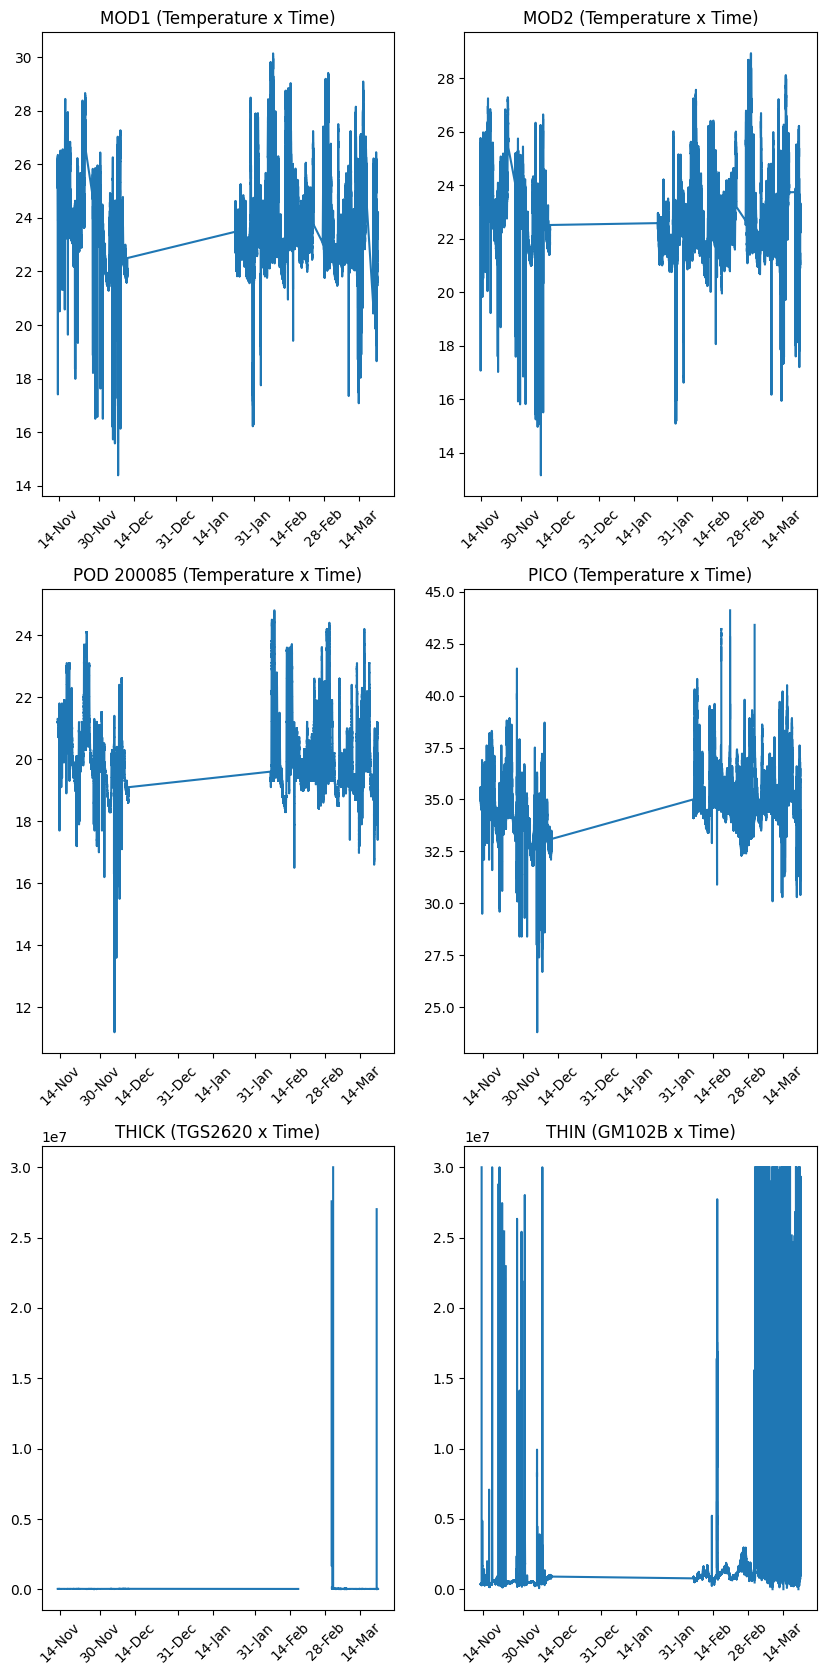


(array([19310.95833333, 19326.95833333, 19340.95833333, 19357.95833333,
        19371.95833333, 19388.95833333, 19402.95833333, 19416.95833333,
        19430.95833333]),
 [Text(19310.958333333332, 0, '14-Nov'),
  Text(19326.958333333332, 0, '30-Nov'),
  Text(19340.958333333332, 0, '14-Dec'),
  Text(19357.958333333332, 0, '31-Dec'),
  Text(19371.958333333332, 0, '14-Jan'),
  Text(19388.958333333332, 0, '31-Jan'),
  Text(19402.958333333332, 0, '14-Feb'),
  Text(19416.958333333332, 0, '28-Feb'),
  Text(19430.958333333332, 0, '14-Mar')])

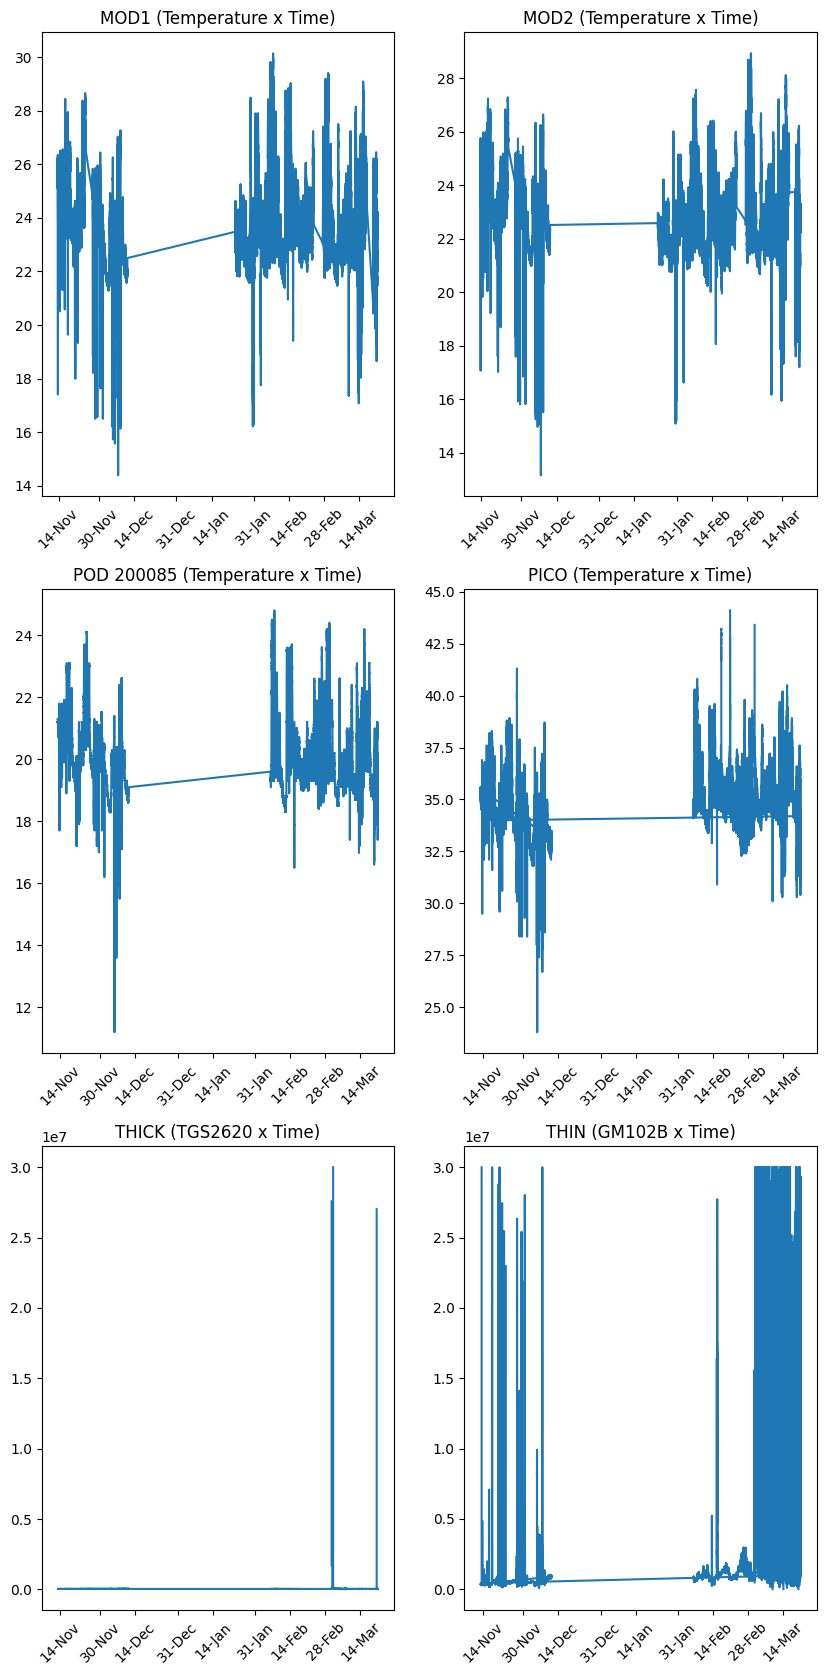

In [ ]:
# The code:
plt.figure(figsize=(10, 2))  # Plot overview of the files
date_format = mdates.DateFormatter('%d-%b')

plt.subplot(3,2,1) # MOD1
plt.subplots_adjust(top=8)
plt.title("MOD1 (Temperature x Time)")
plt.plot(mods1['Time'],mods1['Temperature'])
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.subplot(3,2,2) # MOD2
plt.subplots_adjust(top=8)
plt.title("MOD2 (Temperature x Time)")
plt.plot(mods2['Time'],mods2['Temperature'])
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.subplot(3,2,3) # POD 200085
plt.subplots_adjust(top=8)
plt.title("POD 200085 (Temperature x Time)")
plt.plot(pod85['Time'],pod85['temperature'])
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.subplot(3,2,4) # Piano PICO
plt.subplots_adjust(top=8)
plt.title("PICO (Temperature x Time)")
plt.plot(picoGrouped['Time'],picoGrouped['bme68x_temp'])
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.subplot(3,2,5) # Piano Thick
plt.subplots_adjust(top=8)
plt.title("THICK (TGS2620 x Time)")
plt.plot(thickGrouped['Time'],thickGrouped['piano_TGS2620I00'])
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.subplot(3,2,6) # Piano Thin
plt.subplots_adjust(top=8)
plt.title("THIN (GM102B x Time)")
plt.plot(thinGrouped['Time'],thinGrouped['piano_GM102BI00'])
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

# Second task (to sync the modules)

The data from the Piano modules and the PODs are trivial to synchronize (**look-up the pd.merge() function**: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merge) as they all have the same sampling time. The tricky part is to sync *mod1* and *mod2* with the rest of the modules, mainly because of the 4 seconds sampling time. The requirement for the task is to average the *mod* samples in between the PODs and Piano samples, this is simpler than it looks. You can round the time vector of mod modules using the command:

In [ ]:
# mod['time'] = mod['time'].dt.round('~interval and unit of time~')

Then, you can group the dataframe by samples with the same time vector and calculate the mean between them. Look-up groupby() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html#pandas-dataframe-groupby) and try to make it work.

After you have a new dataframe with the correct sampling time, you can merge all dataframes using the function pd.merge() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html#pandas.merge) and use the 'Time' columns as the reference for the merge. The final dataframe should have a suffix in the columns showing from which module the column came from in the form '_module' (look-up the *suffixes* parameter of the pd.merge() function).

In [ ]:
""" Fonction permettant d'ajouter un suffixe aux colonnes du dataframe 'df'"""

def add_suffix(df, suffixe):
    first_column = df.columns[0]
    columns_to_suffix = df.columns[1:]
    modified_columns = df[columns_to_suffix].add_suffix(suffixe)
    return pd.concat([df[first_column], modified_columns], axis=1)

In [ ]:
# Synchronisation des modules mods1 et mods2 pour que leurs intervals soient au même niveau que les autres (interval de 10 secondes)
interval = pd.Timedelta(seconds=10)
mods1['Time'] = pd.to_datetime(mods1['Time'])
mods1['Time'] = mods1['Time'].dt.round(interval)
mods1 = mods1.groupby('Time', as_index=False).mean()

mods2['Time'] = pd.to_datetime(mods2['Time'])
mods2['Time'] = mods2['Time'].dt.round(interval)
mods2 = mods2.groupby('Time', as_index=False).mean()

In [ ]:
# Ajout des suffixes pour chaque colonnes de chaque capteur
mod1 = add_suffix(mods1, '_mod1')
mod2 = add_suffix(mods2, '_mod2')
pod85 = add_suffix(pod85, '_pod85')
pod86 = add_suffix(pod86, '_pod86')
pod88 = add_suffix(pod88, '_pod88')
pico = add_suffix(picoGrouped, '_pico')
thick = add_suffix(thickGrouped, '_thick')
thin = add_suffix(thinGrouped, '_thin')

In [ ]:
# Sécurité supplémentaire -> Passe les colonnes 'Time' en format String depuis un fichier .csv vers un format de Date (gràce à pd.to_datetime)
pod85['Time'] = pd.to_datetime(pod85['Time'])
pod86['Time'] = pd.to_datetime(pod86['Time'])
pod88['Time'] = pd.to_datetime(pod88['Time'])
pico['Time'] = pd.to_datetime(pico['Time'])
thick['Time'] = pd.to_datetime(thick['Time'])
thin['Time'] = pd.to_datetime(thin['Time'])

In [ ]:
# Fusion/Merge des modules mods1 et mods2
mod_merge = pd.merge(mod1, mod2, on='Time', how='outer')
print("merge mods ...DONE")

# Fusion/Merge des modules Pod 200085, Pod 200086, Pod 200088
pods_merge = pd.merge(pod85, pod86, on='Time', how='outer')
pods_merge = pd.merge(pods_merge, pod88, on='Time', how='outer')
print("merge pods ...DONE")

# Fusion/Merge des modules Pico, Thick et Thin
piano_merge = pd.merge(pico, thick, on='Time', how='outer')
piano_merge = pd.merge(piano_merge, thin, on='Time', how='outer')
print("merge piano ...DONE")

# Fusion/Merge des modules Mods, Pods et Piano
merge_data = pd.merge(mod_merge, pods_merge, on='Time', how='outer')
print("merge mods & pods.. DONE")
merge_data = pd.merge(merge_data, piano_merge, on='Time', how='outer')
print("merge mods/pods & piano ...DONE")

# Sauvegarde des données dans un fichier .csv
output_thin = "/content/drive/MyDrive/projet_data_science_m2/projet_data/data/mergeData.csv"
merge_data.to_csv(output_thin, index=False)

print(merge_data)

merge mods ...DONE
merge pods ...DONE
merge piano ...DONE
merge mods & pods.. DONE
merge mods/pods & piano ...DONE
                            Time    RH_mod1  Temperature_mod1  TGS4161_mod1  \
0      2022-11-14 15:20:20+01:00  34.907333         25.290000      0.502333   
1      2022-11-14 15:20:30+01:00  35.026000         25.286667      0.545667   
2      2022-11-14 15:20:40+01:00  35.231333         25.293333      0.552667   
3      2022-11-14 15:20:50+01:00  35.008000         25.260000      0.555500   
4      2022-11-14 15:21:00+01:00  34.879000         25.216667      0.558000   
...                          ...        ...               ...           ...   
738210 2023-03-20 11:20:00+01:00        NaN               NaN           NaN   
738211 2023-03-20 11:20:10+01:00        NaN               NaN           NaN   
738212 2023-03-20 11:20:20+01:00        NaN               NaN           NaN   
738213 2023-03-20 11:20:30+01:00        NaN               NaN           NaN   
738214 2023-03-2

**If everything goes well, the final dataframe should have 79 columns and between 500k and 700k rows (depending on the order of the merge). This resulting dataframe should be saved as .csv to be used in the following tasks**